In [6]:
#kullanılacak kütüphaneler
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [7]:
#veri setini yükleme
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Eğitim veri boyutu:", X_train.shape)
print("Test veri boyutu:", X_test.shape)

Eğitim veri boyutu: (60000, 28, 28)
Test veri boyutu: (10000, 28, 28)


In [10]:
X_train = X_train / 255.0
X_test = X_test / 255.0
#CNN için verileri uygun boyutlarına getirme
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

print("Yeni eğitim veri şekli:", X_train.shape)

Yeni eğitim veri şekli: (60000, 28, 28, 1)


In [21]:
from tensorflow.keras import layers, models
#model oluşturuyoruz yapay sinir ağı
model = models.Sequential([
    layers.Input(shape=(28, 28, 1)),
    layers.Conv2D(32, (3, 3), activation='relu'), #Görüntüdeki kenar, çizgi gibi şekilleri algılar
    layers.MaxPooling2D((2, 2)), #Görüntüyü küçültür, önemli bilgileri korur
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(), #2D görüntüyü 1D vektöre dönüştürür
    layers.Dense(128, activation='relu'), #Öğrenilen özellikleri işler ve karar verir
    layers.Dense(10, activation='softmax') #0–9 arasında en olası rakamı verir (çıktı katmanı)
])


In [22]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


In [23]:
model.fit(X_train, y_train, epochs=5, validation_data=(X_test, y_test))



Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.7492 - loss: 0.7506 - val_accuracy: 0.9285 - val_loss: 0.2398
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9397 - loss: 0.1993 - val_accuracy: 0.9527 - val_loss: 0.1509
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9579 - loss: 0.1371 - val_accuracy: 0.9645 - val_loss: 0.1098
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9656 - loss: 0.1105 - val_accuracy: 0.9688 - val_loss: 0.0917
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9703 - loss: 0.0959 - val_accuracy: 0.9760 - val_loss: 0.0783


In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test doğruluk oranı: {:.2f}%".format(test_acc * 100))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9760 - loss: 0.0783 
Test doğruluk oranı: 97.60%


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


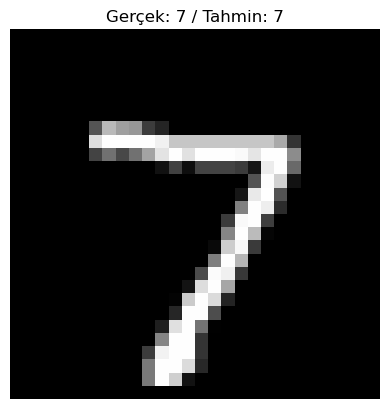

In [26]:
# Test aşaması
index = 0  
sample = X_test[index]

# Tahmin yap 
prediction = model.predict(sample[np.newaxis, ...])
predicted_label = np.argmax(prediction)

# Görseli ve tahmini göster
plt.imshow(sample.reshape(28, 28), cmap='gray')
plt.title(f"Gerçek: {y_test[index]} / Tahmin: {predicted_label}")
plt.axis('off')
plt.show()

In [27]:
model.save("model.h5")